In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2

from os.path import join


In [3]:
def draw_shape(img_base, type = 'sq'):
    sizex = int(np.random.random(1)*200)
    sizey = int(np.random.random(1) * 200)

    xstart = np.random.choice(range(1000-sizex),1)[0]
    ystart = np.random.choice(range(1000 - sizey), 1)[0]

    rgb_shape = np.random.random(3)
    if type == 'sq':
        img_base[xstart:xstart+sizex, ystart:ystart+sizey] = rgb_shape
    if type == 'circ':
        #temp_area = np.ones((sizex, sizey, 3))*rgb
        for i in range(sizex):
            for j in range(sizey):
                if (i-(sizex/2))**2/(sizex/2)**2 + (j-(sizey/2))**2/(sizey/2)**2 <=1:
                    img_base[xstart + i, ystart + j] = rgb_shape
        #img_base[xstart:xstart + sizex, ystart:ystart + sizey] = temp_area
    return img_base

/tmp/ipykernel_4601/1955742028.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sizex = int(np.random.random(1)*200)
/tmp/ipykernel_4601/1955742028.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sizey = int(np.random.random(1) * 200)


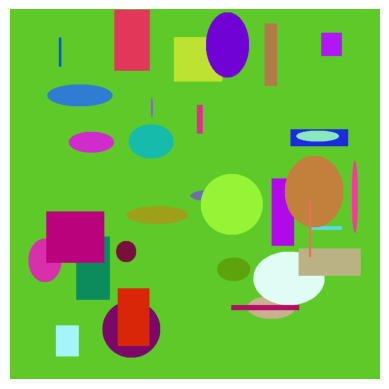

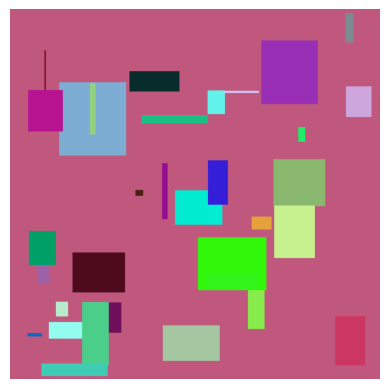

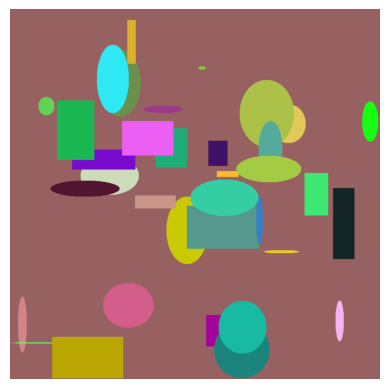

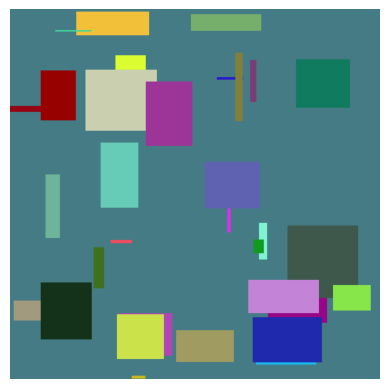

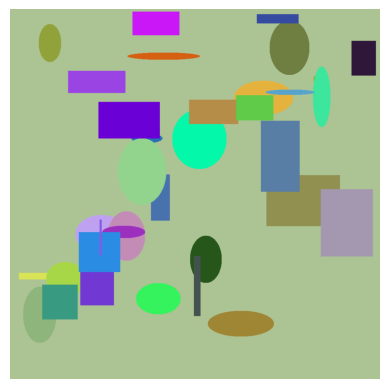

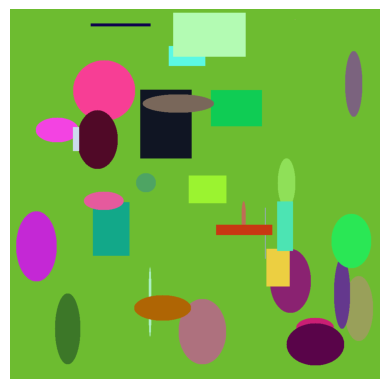

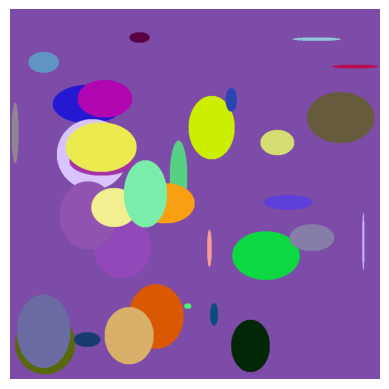

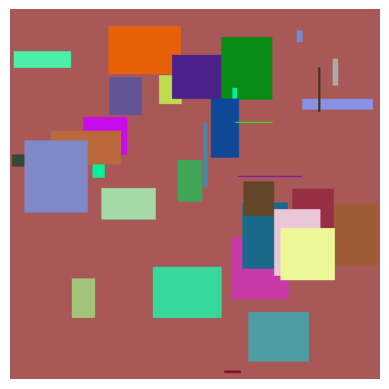

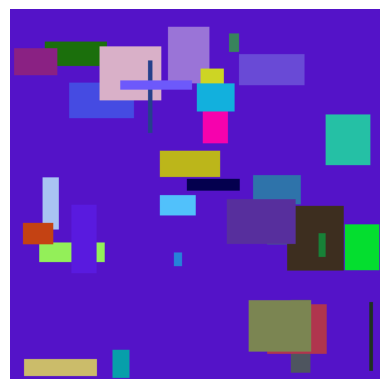

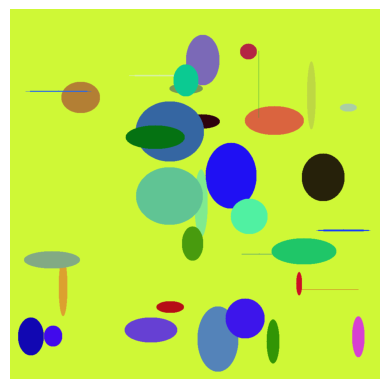

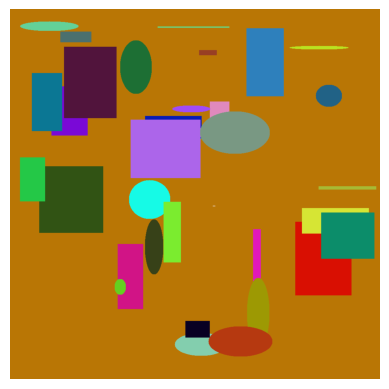

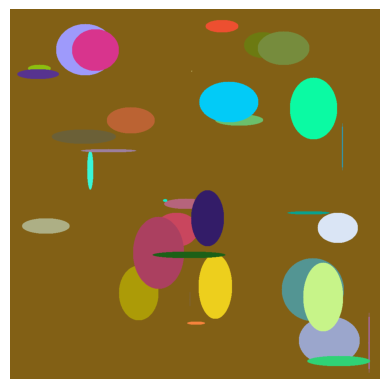

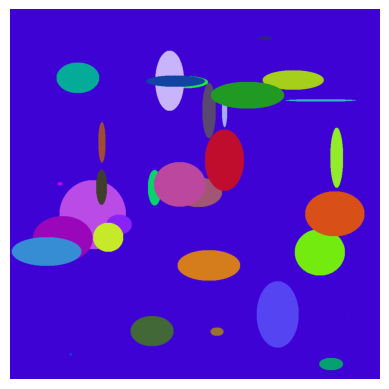

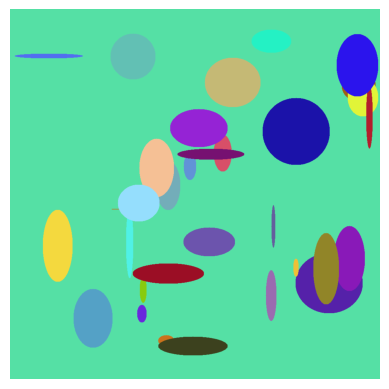

In [4]:
for i in range(14):
    img_base = np.ones((1000,1000,3))
    
    #rgb = np.array([0.5,0.5,0.5])
    rgb = np.random.random(3)
    
    img_base*=rgb
    
    nb_shapes = [35]
    shape_type = np.random.choice(['sq-circ', 'sq', 'circ'])
    
    for s in range(nb_shapes[0]):
        if shape_type == 'sq-circ':
            rnb = np.random.random(1)[0]
            #print(rnb)
            if rnb >0.5:
                img_base = draw_shape(img_base, type='circ')
            else:
                img_base = draw_shape(img_base, type='sq')
        else:
            img_base = draw_shape(img_base, type=shape_type)
    
    plt.imshow(img_base)
    plt.axis('off')
    plt.show()
    
    cv2.imwrite(f'testset/patterns/color_pattern{i}.jpg',img_base*255)

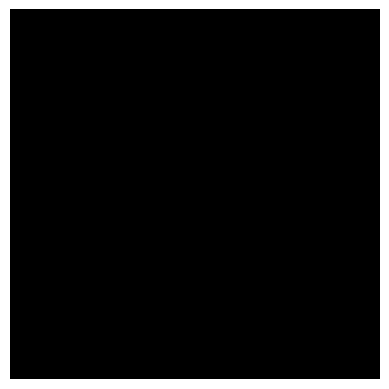

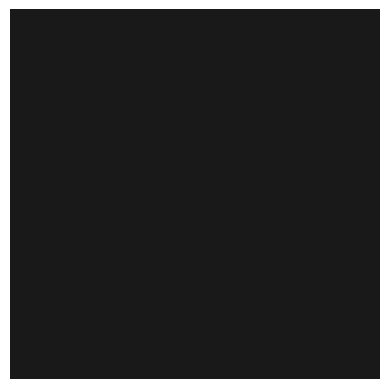

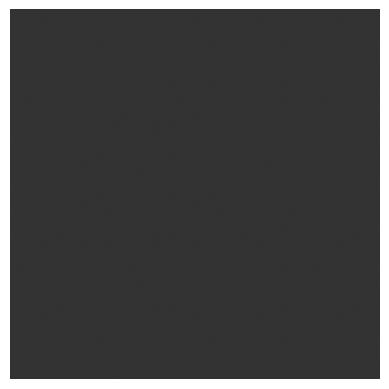

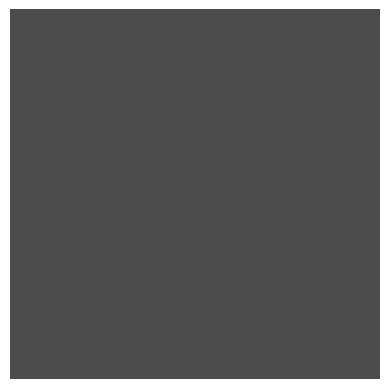

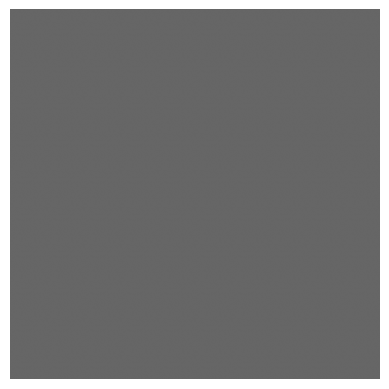

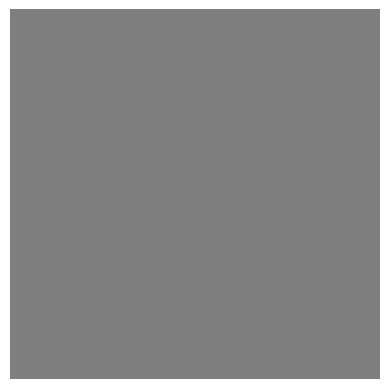

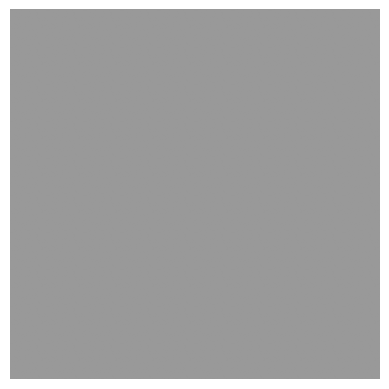

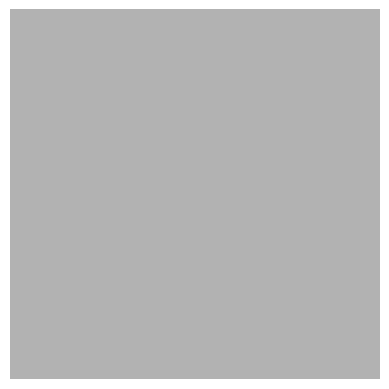

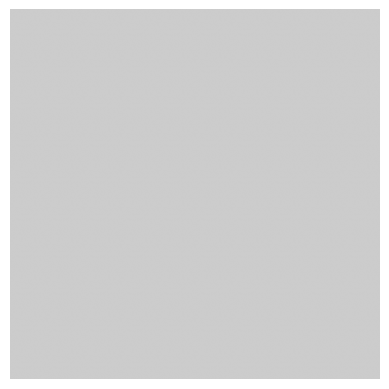

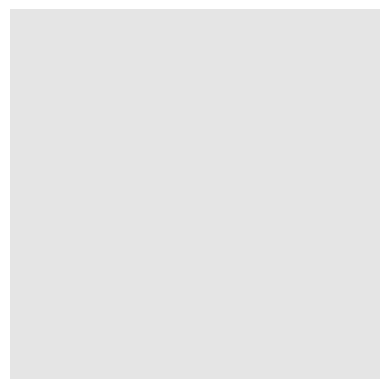

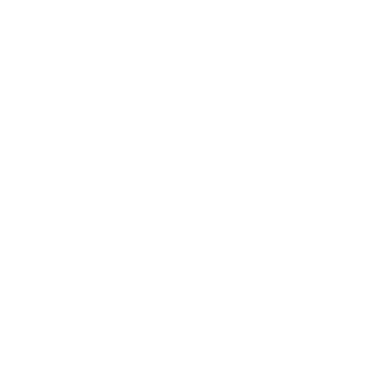

In [6]:
L = np.arange(0,1.05,0.1)

for i, l in enumerate(L):
    img_base = np.ones((1000,1000,3))
    
    #rgb = np.array([0.5,0.5,0.5])
    rgb = np.array([l,l,l])
    
    img_base*=rgb
    
    plt.imshow(img_base)
    plt.axis('off')
    plt.show()
    
    cv2.imwrite(f'testset/patterns/unicolor{i}.jpg',img_base*255)

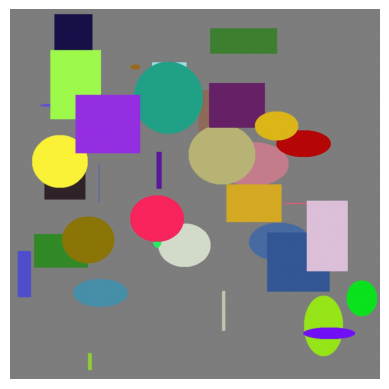

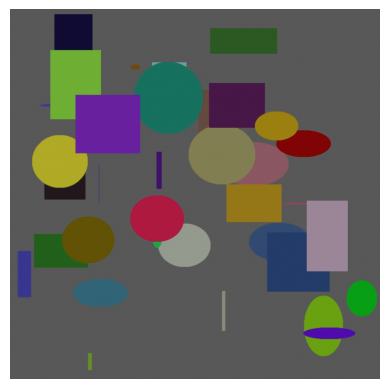

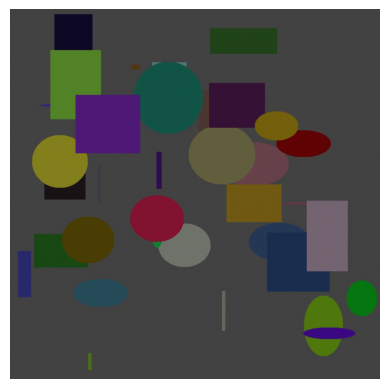

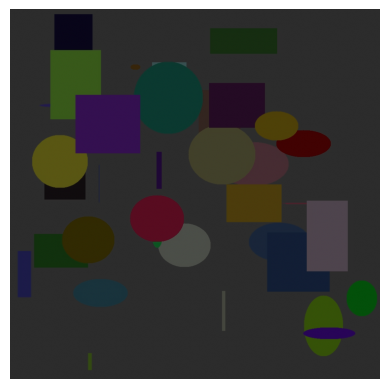

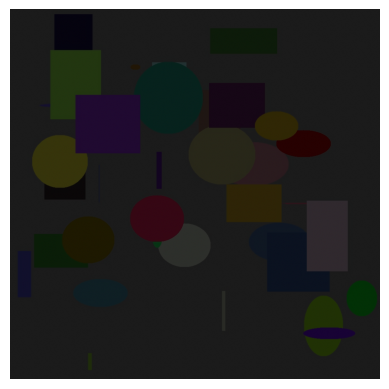

In [12]:
### change lightness of pattern 3
diff_lum = [1.0183218, 1.4463452, 1.9355149, 2.852709, 4.687096]


for i, dl in enumerate(diff_lum):
    img_base = cv2.imread(f'testset/patterns/pattern3.jpg')
    
    #rgb = np.array([0.5,0.5,0.5])
    img_base = img_base//dl
    plt.imshow(img_base/255)
    plt.axis('off')
    plt.show()
    
    cv2.imwrite(f'testset/patterns/pattern3_{i}.jpg', img_base)